# Statistiques descriptives

In [1]:
import pandas as pd
import numpy as np
import os
import s3fs
import re
import matplotlib.pyplot as plt

In [2]:
# Create filesystem object
S3_ENDPOINT_URL = "https://" + os.environ["AWS_S3_ENDPOINT"]
fs = s3fs.S3FileSystem(client_kwargs={'endpoint_url': S3_ENDPOINT_URL})

# 1 - Comportement d'achat

In [3]:
# Chargement des données temporaires
BUCKET = "projet-bdc2324-team1"
FILE_KEY_S3 = "0_Temp/Company 1 - Purchasing behaviour.csv"
FILE_PATH_S3 = BUCKET + "/" + FILE_KEY_S3

with fs.open(FILE_PATH_S3, mode="rb") as file_in:
    tickets_kpi = pd.read_csv(file_in, sep=",")

In [4]:
tickets_kpi.head()

customer_id  event_type_id  nb_tickets  total_amount  nb_suppliers  \
0            1              2      384226     2686540.5             7   
1            1              4      453242     3248965.5             6   
2            1              5      201750     1459190.0             6   
3            1              6      217356     1435871.5             5   
4            2              2         143           0.0             1   

   vente_internet_max          purchase_date_min          purchase_date_max  \
0                   1  2014-12-03 14:55:37+00:00  2023-11-04 15:12:16+00:00   
1                   1  2013-09-23 14:45:01+00:00  2023-11-03 14:11:01+00:00   
2                   1  2013-06-10 10:37:58+00:00  2023-11-08 15:59:45+00:00   
3                   1  2017-01-01 02:20:08+00:00  2019-12-31 02:20:06+00:00   
4                   0  2018-04-07 12:55:07+00:00  2020-03-08 12:06:43+00:00   

  time_between_purchase  nb_tickets_internet  
0    3258 days 00:16:39                 51.0  
1    3692 days 23:26:00               2988.0  
2    3803 days 05:21:47                  9.0  
3    1093 days 23:59:58                  5.0  
4     700 days 23:11:36                  0.0

In [5]:
tickets_kpi.columns

Index(['customer_id', 'event_type_id', 'nb_tickets', 'total_amount',
       'nb_suppliers', 'vente_internet_max', 'purchase_date_min',
       'purchase_date_max', 'time_between_purchase', 'nb_tickets_internet'],
      dtype='object')

In [6]:
# Présence d'outlier
tickets_kpi.sort_values(by = ['nb_tickets'], axis = 0, ascending = False).head(10)

customer_id  event_type_id  nb_tickets  total_amount  nb_suppliers  \
1                1              4      453242     3248965.5             6   
0                1              2      384226     2686540.5             7   
3                1              6      217356     1435871.5             5   
2                1              5      201750     1459190.0             6   
5032          6733              6       14208           0.0             3   
5029          6733              2       11656         471.0             3   
5030          6733              4        7440           0.0             2   
60              41              6        6583       12546.5             4   
57              41              2        6514       22423.0             6   
36376        63488              4        5750       63250.0             1   

       vente_internet_max          purchase_date_min  \
1                       1  2013-09-23 14:45:01+00:00   
0                       1  2014-12-03 14:55:37+00:00   
3                       1  2017-01-01 02:20:08+00:00   
2                       1  2013-06-10 10:37:58+00:00   
5032                    1  2017-01-11 15:00:54+00:00   
5029                    1  2015-09-09 13:48:38+00:00   
5030                    1  2021-01-06 10:05:01+00:00   
60                      1  2017-01-02 11:23:53+00:00   
57                      1  2014-01-23 16:56:57+00:00   
36376                   1  2021-06-04 12:20:39+00:00   

               purchase_date_max time_between_purchase  nb_tickets_internet  
1      2023-11-03 14:11:01+00:00    3692 days 23:26:00               2988.0  
0      2023-11-04 15:12:16+00:00    3258 days 00:16:39                 51.0  
3      2019-12-31 02:20:06+00:00    1093 days 23:59:58                  5.0  
2      2023-11-08 15:59:45+00:00    3803 days 05:21:47                  9.0  
5032   2019-11-27 09:47:06+00:00    1049 days 18:46:12              13497.0  
5029   2022-07-07 07:37:12+00:00    2492 days 17:48:34               9815.0  
5030   2022-09-08 14:39:40+00:00     610 days 04:34:39               7419.0  
60     2019-12-30 10:36:55+00:00    1091 days 23:13:02               6391.0  
57     2023-03-06 13:55:23+00:00    3328 days 20:58:26               5321.0  
36376  2022-08-25 13:08:38+00:00     447 days 00:47:59               5750.0

In [7]:
# Part du CA par customer
total_amount_share = tickets_kpi.groupby('customer_id')['total_amount'].sum().reset_index()
total_amount_share['total_amount_entreprise'] = total_amount_share['total_amount'].sum()
total_amount_share['share_total_amount'] = total_amount_share['total_amount']/total_amount_share['total_amount_entreprise']

total_amount_share_index = total_amount_share.set_index('customer_id')
df_circulaire = total_amount_share_index['total_amount'].sort_values(axis = 0, ascending = False)


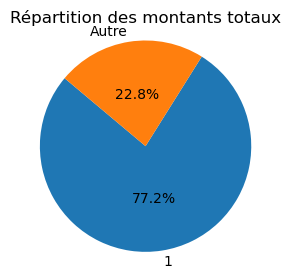

In [8]:
# Costumer 1 vs others customers
coupure = 1

top = df_circulaire[:coupure]
rest = df_circulaire[coupure:]

# Calculez la somme du reste
rest_sum = rest.sum()

# Créez une nouvelle série avec les cinq plus grandes parts et 'Autre'
new_series = pd.concat([top, pd.Series([rest_sum], index=['Autre'])])

# Créez le graphique circulaire
plt.figure(figsize=(3, 3))
plt.pie(new_series, labels=new_series.index, autopct='%1.1f%%', startangle=140, pctdistance=0.5)
plt.axis('equal')  # Assurez-vous que le graphique est un cercle
plt.title('Répartition des montants totaux')
plt.show()


In [9]:
tickets_kpi_filtered  = tickets_kpi[tickets_kpi['customer_id'] != 1]